In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()


Saving NBA_Data.csv to NBA_Data.csv


Below is the statistical exploration of our data. We are running t-tests on each of the components of a team's shooting split between teams with winning records (at least .500 winning percentage) and teams with losing records (below .500 winning percentage). Then, we are running chi-square tests to see if there is a significant relationship between team success categories like 0-30 wins, 30-50 wins, 50+ wins and teams with above average FT% (based on the years included in the dataset)


In [3]:
df = pd.read_csv('NBA_Data.csv')
df.head()

,No,Team,Fgm-a,FgPct,3gm-a,3pPct,Ftm-a,FtPct,Year,Record,Win Amount,Winning Percentage,Champion
0,6,Atlanta,38.4-84.5,0.455,10.0-28.8,0.348,15.7-20.0,0.784,2015-2016,48-34,48,0.585,0
1,4,Atlanta,37.9-82.3,0.460,9.8-26.6,0.369,16.2-20.9,0.778,2014-2015,60-22,60,0.732,0
2,18,Atlanta,36.8-81.3,0.452,9.5-26.4,0.361,17.3-22.0,0.785,2013-2014,38-44,38,0.463,0
3,16,Atlanta,37.3-80.8,0.461,8.4-22.9,0.369,14.4-20.2,0.712,2012-2013,44-38,44,0.537,0
4,11,Atlanta,36.4-80.9,0.450,7.3-20.0,0.365,15.3-20.6,0.743,2011-2012,40-26,40,0.606,0


In [4]:
#Import all libraries
import scipy.stats
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

<Axes: >

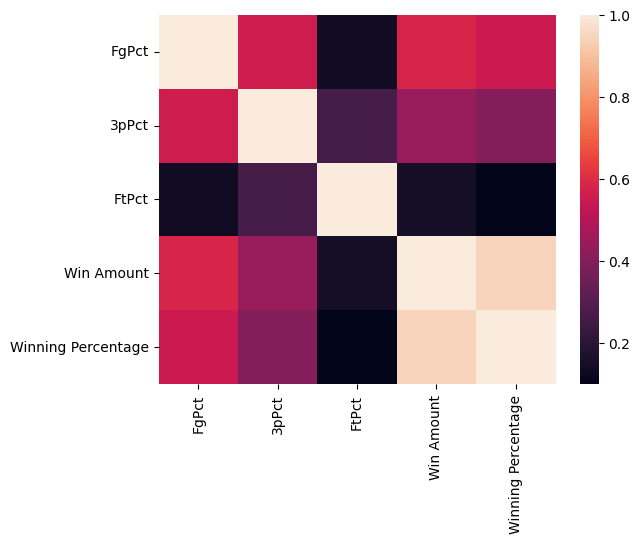

In [5]:
#heat map to show corrolation between each of the columns
sn.heatmap(df[['FgPct','3pPct','FtPct','Win Amount', 'Winning Percentage']].corr())

In [6]:
#splitting data into winning records vs losing records
winning_stats=df[df['Winning Percentage']>=.500]
losing_stats=df[df['Winning Percentage']<.500]

#split data into the 3 categories of shooting splits

winning_FG=winning_stats['FgPct']
winning_3P=winning_stats['3pPct']
winning_FT=winning_stats['FtPct']
losing_FG=losing_stats['FgPct']
losing_3P=losing_stats['3pPct']
losing_FT=losing_stats['FtPct']

In [7]:
#run t-tests for the mean shooting splits of the winning versus losing records
_, p =scipy.stats.ttest_ind(winning_FG,losing_FG)
print(f'FgPct: {p}')
_, p1 =scipy.stats.ttest_ind(winning_3P,losing_3P)
print(f'3pPct: {p1}')
_, p2 =scipy.stats.ttest_ind(winning_FT,losing_FT)
print(f'FtPct: {p2}')

FgPct: 3.063274446725167e-21
3pPct: 1.2453553624357497e-09
FtPct: 0.157568787072481


In [8]:
#find the average free throw percentage
mean_FT=df['FtPct'].mean()
#Add columns to dataframe for success levels and yes/no above average
df['Above Average FT']=np.where(df['FtPct']>mean_FT,'Yes','No')
df.loc[(df['Winning Percentage']<.200, 'Success Level')] = "Below 1/5 games won"
df.loc[((df['Winning Percentage']>=.200)&(df['Winning Percentage']<.400), 'Success Level')] = "Between 1/5 to 2/5 games won"
df.loc[((df['Winning Percentage']>=.400)&(df['Winning Percentage']<.600), 'Success Level')] = "Between 2/5 to 3/5 games won"
df.loc[((df['Winning Percentage']>=.600)&(df['Winning Percentage']<.800), 'Success Level')] = "Between 3/5 to 4/5 games won"
df.loc[((df['Winning Percentage']>=.800), 'Success Level')] = "Over 4/5 games won"
df.head()

,No,Team,Fgm-a,FgPct,3gm-a,3pPct,Ftm-a,FtPct,Year,Record,Win Amount,Winning Percentage,Champion,Above Average FT,Success Level
0,6,Atlanta,38.4-84.5,0.455,10.0-28.8,0.348,15.7-20.0,0.784,2015-2016,48-34,48,0.585,0,Yes,Between 2/5 to 3/5 games won
1,4,Atlanta,37.9-82.3,0.460,9.8-26.6,0.369,16.2-20.9,0.778,2014-2015,60-22,60,0.732,0,Yes,Between 3/5 to 4/5 games won
2,18,Atlanta,36.8-81.3,0.452,9.5-26.4,0.361,17.3-22.0,0.785,2013-2014,38-44,38,0.463,0,Yes,Between 2/5 to 3/5 games won
3,16,Atlanta,37.3-80.8,0.461,8.4-22.9,0.369,14.4-20.2,0.712,2012-2013,44-38,44,0.537,0,No,Between 2/5 to 3/5 games won
4,11,Atlanta,36.4-80.9,0.450,7.3-20.0,0.365,15.3-20.6,0.743,2011-2012,40-26,40,0.606,0,No,Between 3/5 to 4/5 games won


In [10]:
#convert data into a dataframe of counts for chi-sqaure analysis
contingency=pd.crosstab(df["Success Level"],df["Above Average FT"])
contingency

Above Average FT,No,Yes
Success Level,,
Below 1/5 games won,8,3
Between 1/5 to 2/5 games won,65,58
Between 2/5 to 3/5 games won,110,143
Between 3/5 to 4/5 games won,69,87
Over 4/5 games won,1,7


In [11]:
#run a chi-sqaure test to determine the significance of FT% to Win Level
_,p,_,_=scipy.stats.chi2_contingency(contingency)
p

0.04138923190508926

In [19]:
#Create the k-nearest neighbors model

# Defining X and Y
X= df[["FgPct","3pPct","FtPct"]]
Y=df["Winning Percentage"]

#Spliting data in train, validation and test sets
data_train, data_test, label_train, label_test = train_test_split(X, Y,test_size=.2)
data_train, data_val, label_train, label_val = train_test_split(data_train, label_train,test_size=.2)

In [20]:
#find the best performing model
# This is the K-Nearest Neigbor model
nbrs_best=0
prediction = []
neighbor_range = range(1,11,1)

for i in neighbor_range:
  nbrs = KNeighborsRegressor(n_neighbors=i).fit(data_train, label_train)
  predictions = nbrs.predict(data_val)
  prediction.append(predictions)
  print(f'{i} Neighbors:{(mean_squared_error(label_val, predictions))**(1/2)}')
  if nbrs.score(data_val,label_val)>nbrs_best:
    nbrs_best=nbrs.score(data_val,label_val)
    best_nbrs=i
    nbrs_max=nbrs
print('The best performing model was with',best_nbrs, "neighbors")

1 Neighbors:0.16917379444604513
2 Neighbors:0.13487050818200666
3 Neighbors:0.12575077564674333
4 Neighbors:0.12588845903941387
5 Neighbors:0.12160498644082292
6 Neighbors:0.12179485385995452
7 Neighbors:0.1170441647532372
8 Neighbors:0.11750164106687655
9 Neighbors:0.1183404109421328
10 Neighbors:0.11871177662342904
The best performing model was with 7 neighbors


In [21]:
#score the best performing model
nbrs_max.score(data_test,label_test)

0.2652318400070032

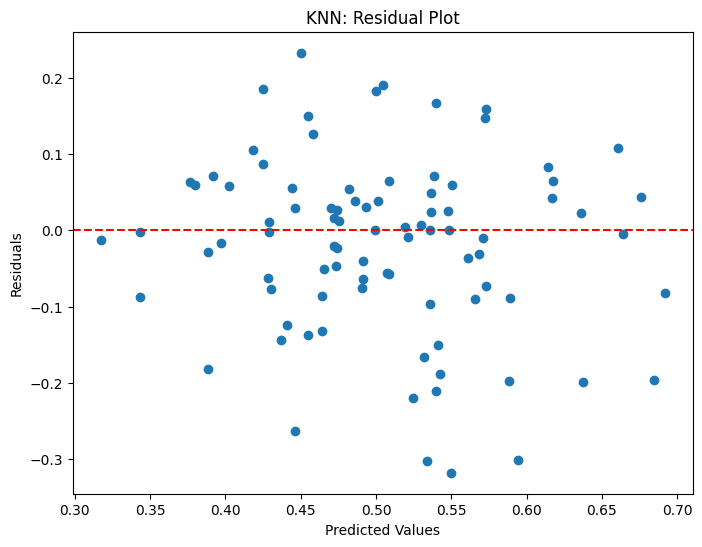

In [22]:
# creating a Residual plot for KNN to demonstrate the difference between actual and predicted values
residuals = label_val - prediction[best_nbrs - 1]
plt.figure(figsize=(8, 6))
plt.scatter(prediction[best_nbrs - 1], residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('KNN: Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
plt.show()


In [31]:
#create a k neighbors classifier to determine championship or not
X= df[["FgPct","3pPct","FtPct"]]
Y=df["Champion"]

#Spliting data in train, validation and test sets
data_train, data_test, label_train, label_test = train_test_split(X, Y,test_size=.2)
data_train, data_val, label_train, label_val = train_test_split(data_train, label_train,test_size=.2)

In [32]:
nbrs_best2=0
prediction = []
neighbor_range = range(1,11,1)

for i in neighbor_range:
  nbrs2 = KNeighborsClassifier(n_neighbors=i).fit(data_train, label_train)
  print(f'{i} Neighbors:{nbrs2.score(data_val,label_val)}')
  if nbrs2.score(data_val,label_val)>nbrs_best2:
    nbrs_best2=nbrs2.score(data_val,label_val)
    best_nbrs2=i
    nbrs2_max=nbrs2
print('The best performing model was with',best_nbrs2, "neighbors")

1 Neighbors:0.9772727272727273
2 Neighbors:0.9886363636363636
3 Neighbors:0.9772727272727273
4 Neighbors:0.9772727272727273
5 Neighbors:0.9659090909090909
6 Neighbors:0.9886363636363636
7 Neighbors:0.9886363636363636
8 Neighbors:0.9886363636363636
9 Neighbors:0.9886363636363636
10 Neighbors:0.9886363636363636
The best performing model was with 2 neighbors


In [33]:
nbrs2_max.score(data_test,label_test)

0.972972972972973

In [45]:
#create and tweak parameters for Random Forest
#Spliting data

X= df[["FgPct","3pPct","FtPct"]]
Y=df["Winning Percentage"]

data_train, data_test, label_train, label_test = train_test_split(X, Y,test_size=.2)
data_train, data_val, label_train, label_val = train_test_split(data_train, label_train,test_size=.2)

estimators_range = range(25, 325, 25)
forest_best=0
score = []

for estimators in estimators_range:
  forest=RandomForestRegressor(n_estimators=estimators).fit(data_train,label_train)
  val_score = forest.score(data_val, label_val)
  score.append(val_score)
  print(f'{estimators} Estimators: {forest.score(data_val,label_val)}')
  if forest.score(data_val,label_val)>forest_best:
    forest_best=forest.score(data_val,label_val)
    best_estimators=estimators
    forest_max=forest
print('The best performing model was with',best_estimators, "estimators")


25 Estimators: 0.24547395629510782
50 Estimators: 0.2320728565245752
75 Estimators: 0.2265635443520959
100 Estimators: 0.2471024342839353
125 Estimators: 0.24632458016067138
150 Estimators: 0.25401743340764005
175 Estimators: 0.25468866563899617
200 Estimators: 0.2530968795815578
225 Estimators: 0.25185622423875786
250 Estimators: 0.2508883703476391
275 Estimators: 0.2526357954598072
300 Estimators: 0.2526207604936791
The best performing model was with 175 estimators


In [46]:
#test the best performing model
forest_max.score(data_test,label_test)

0.27652967652812166

In [47]:
forest.feature_importances_

array([0.45272666, 0.27947096, 0.26780238])

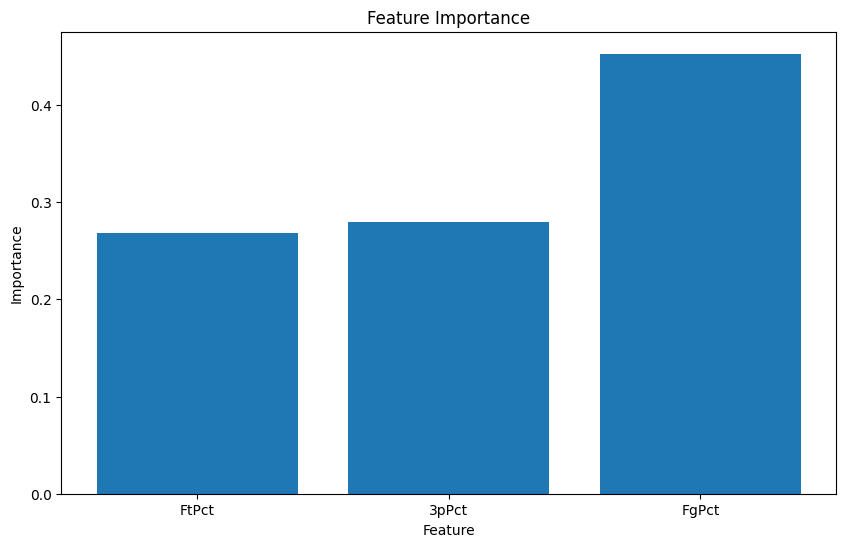

In [48]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': forest.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance')
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

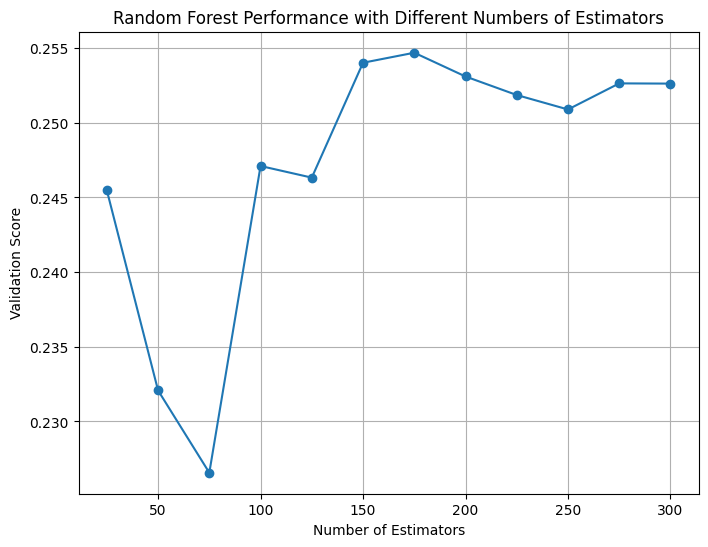

In [49]:
# Plotting the validation scores for different estimators for the Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.plot(estimators_range, score, marker='o')
plt.title('Random Forest Performance with Different Numbers of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Score')
plt.grid(True)
plt.show()


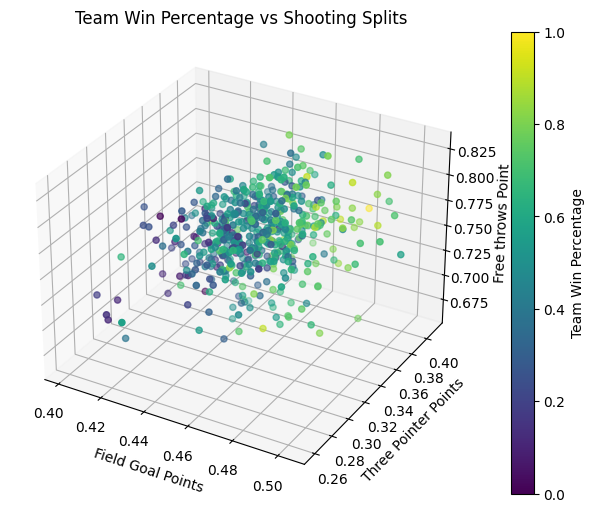

In [50]:
# Pltting hte different throws
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df['FgPct'], df['3pPct'], df['FtPct'], c=df['Winning Percentage'], cmap='viridis')
ax.set_xlabel('Field Goal Points')
ax.set_ylabel('Three Pointer Points')
ax.set_zlabel('Free throws Point')
ax.set_title('Team Win Percentage vs Shooting Splits')

cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='viridis'))
cbar.set_label('Team Win Percentage')

plt.show()

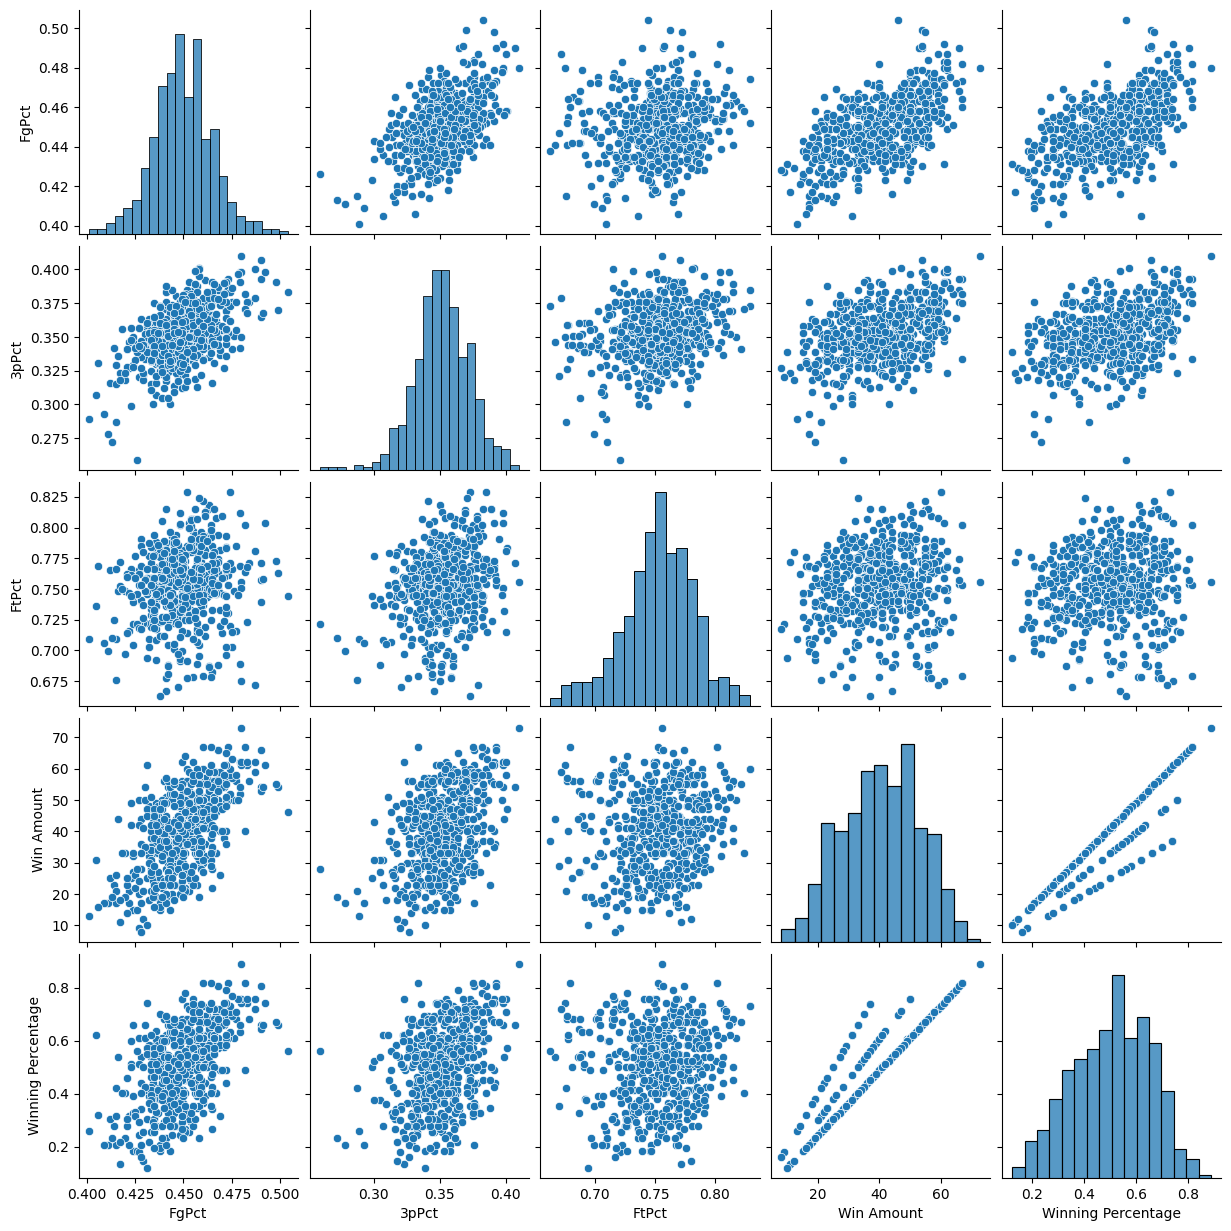

In [51]:
# Paitplot
sn.pairplot(df[['FgPct','3pPct','FtPct','Win Amount', 'Winning Percentage']], kind='scatter',
            diag_kind='auto', markers=None, height=2.5, aspect=1)

In [ ]:
# creating a new table with all of the championship winners
winners_data = df[df['Champion'] == 1]
winners_melted = pd.melt(winners_data, id_vars=['Year'], value_vars=['FgPct','3pPct','FtPct'])
winners_melted = winners_melted.rename(columns={'variable': 'Type of Throw', 'value': 'Percent Made'})
winners_melted.head()

,Year,Type of Throw,Percent Made
0,1998-1999,FgPct,0.455
1,2011-2012,FgPct,0.467
2,2005-2006,FgPct,0.479
3,2003-2004,FgPct,0.430
4,2000-2001,FgPct,0.465


In [ ]:
non_winners = df[df['Champion'] != 1]
# Assuming winners_melted is your DataFrame with the melted data

# Calculate mean for each column excluding values equal to 1
mean_FgPct = non_winners['FgPct'].mean()
mean_3pPct = non_winners['3pPct'].mean()
mean_FtPct = non_winners['FtPct'].mean()

# Create DataFrame with the new rows
new_rows = pd.DataFrame({'Year': ['Average', 'Average', 'Average'],
                         'Type of Throw': ['FgPct', '3pPct', 'FtPct'],
                         'Percent Made': [mean_FgPct, mean_3pPct, mean_FtPct]})

# Append new rows to winners_melted DataFrame
winners_melted = pd.concat([winners_melted, new_rows])
winners_melted.reset_index(drop=True, inplace=True)  # Reset index
winners_melted.tail(20)


,Year,Type of Throw,Percent Made
40,2005-2006,FtPct,0.689000
41,2003-2004,FtPct,0.748000
42,2000-2001,FtPct,0.682000
43,2009-2010,FtPct,0.763000
44,2010-2011,FtPct,0.784000
45,2015-2016,FtPct,0.743000
46,2006-2007,FtPct,0.745000
47,2001-2002,FtPct,0.704000
48,2004-2005,FtPct,0.725000
49,2002-2003,FtPct,0.722000


<Axes: xlabel='Year', ylabel='Percent Made'>

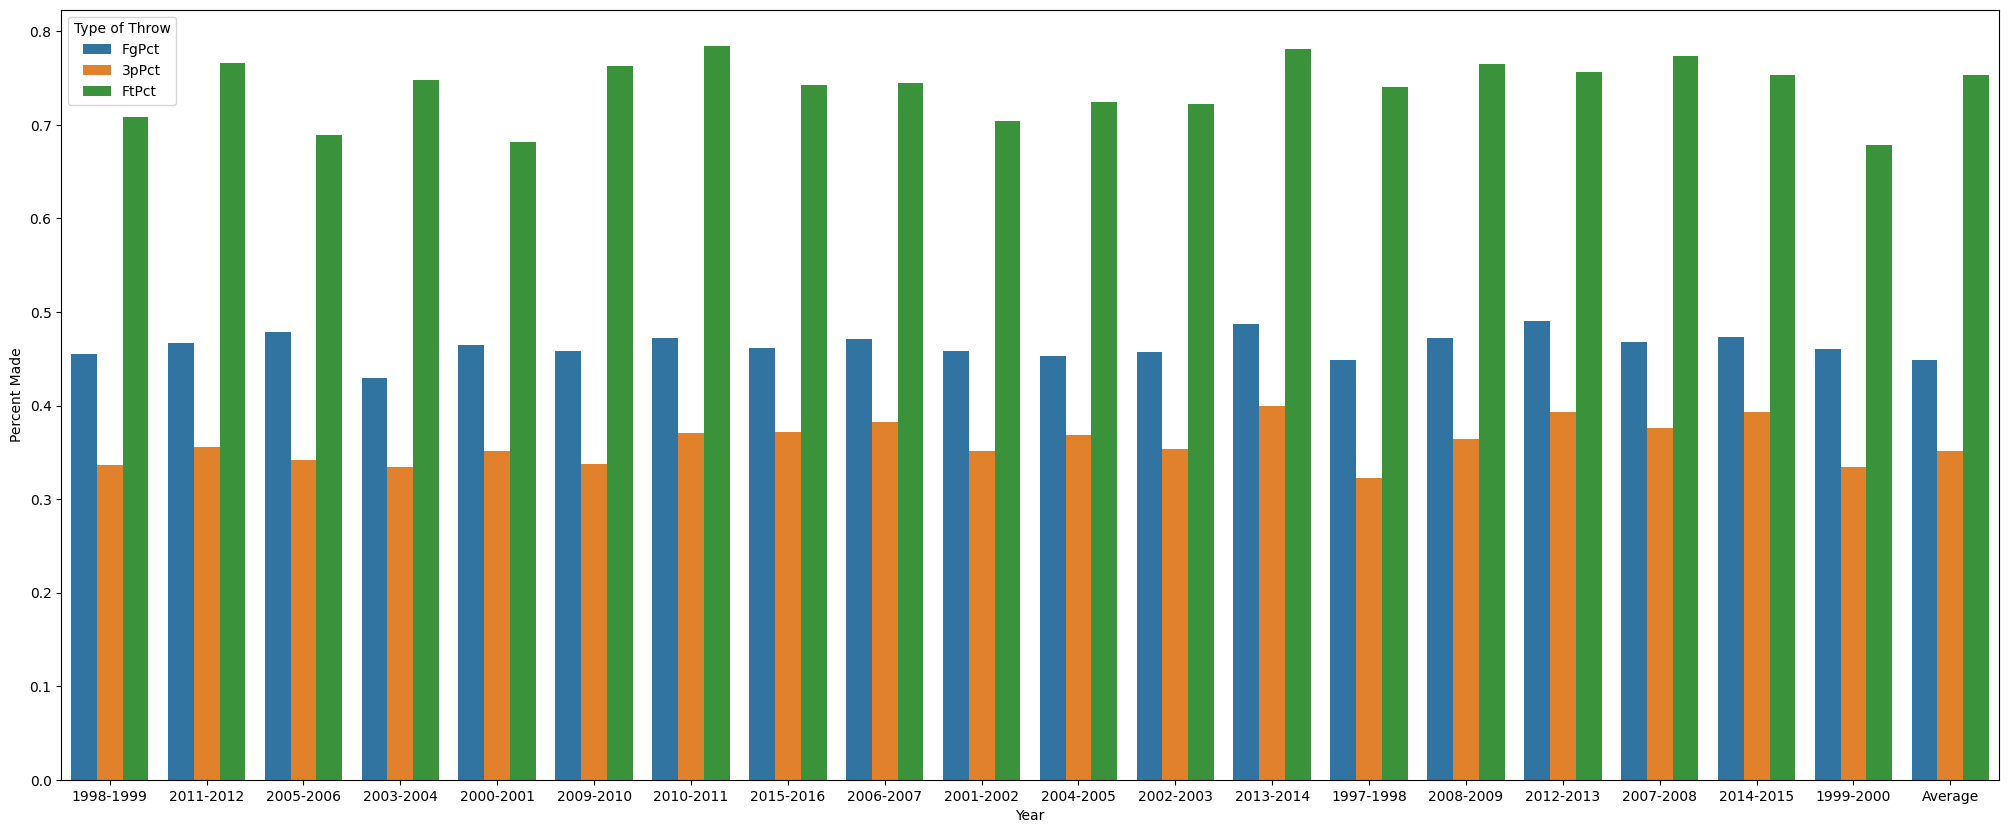

In [ ]:
# sn.histplot(data=winners_melted, x="Year", hue="sex", multiple="dodge", shrink=.8)
plt.figure(figsize = (25,10))
sn.barplot(data=winners_melted, x="Year", y="Percent Made", hue="Type of Throw",)
